In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
train_df = pd.read_csv('/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/notebooks/data/train.csv')
test_df = pd.read_csv('/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/notebooks/data/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
## datatype info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
## statistical info
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# Missing Values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


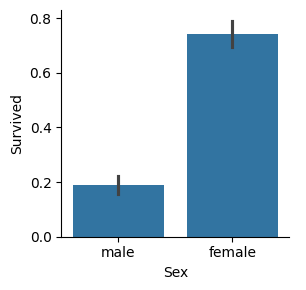

In [34]:
sns.catplot(x='Sex', y='Survived', data = train_df, kind='bar',height=3)
plt.show()

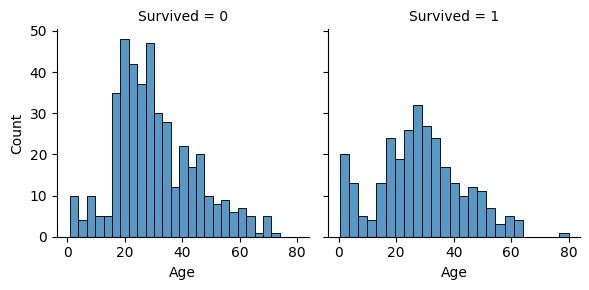

In [35]:
sns.FacetGrid(train_df, col='Survived').map(sns.histplot, "Age", bins=25)
plt.show()

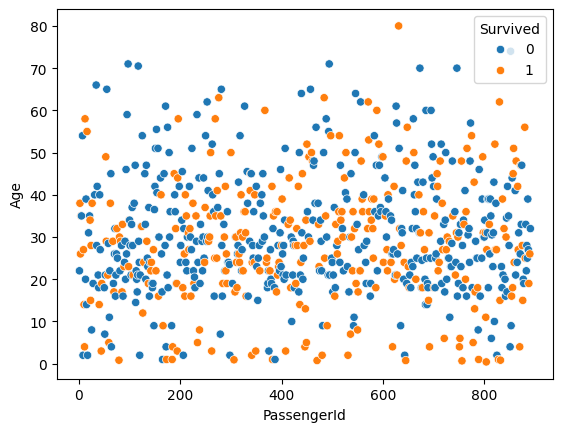

In [36]:
sns.scatterplot(x = train_df.PassengerId, y = train_df["Age"], hue = train_df['Survived'])
plt.show()

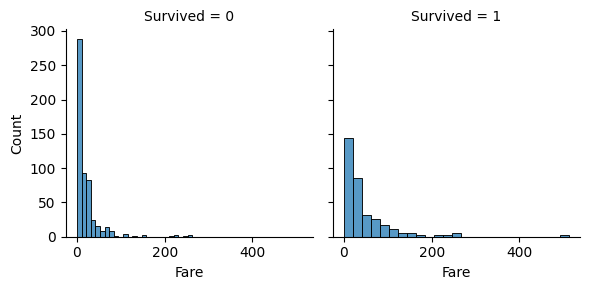

In [37]:
sns.FacetGrid(train_df, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

In [38]:
fare_to_survived_df = train_df[['Fare','Survived']].groupby(['Fare','Survived'], as_index = False).mean()
fare_to_survived_df

,Fare,Survived
0,0.0000,0
1,0.0000,1
2,4.0125,0
3,5.0000,0
4,6.2375,0
...,...,...
325,247.5208,1
326,262.3750,1
327,263.0000,0
328,263.0000,1


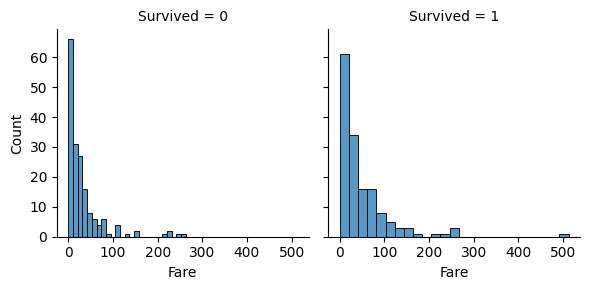

In [39]:
sns.FacetGrid(fare_to_survived_df, col='Survived').map(sns.histplot, "Fare", bins=25)
plt.show()

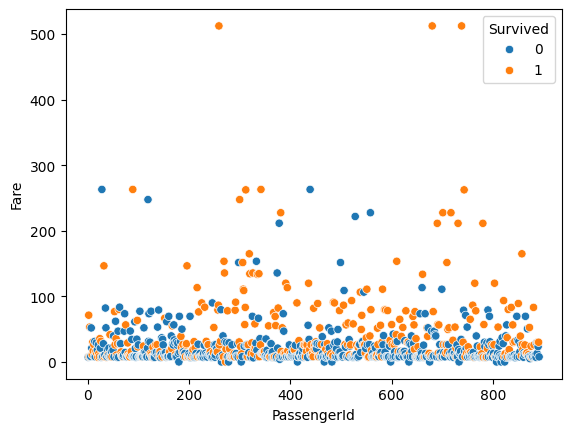

In [40]:
sns.scatterplot(x = train_df.PassengerId, y = train_df["Fare"], hue = train_df['Survived'])
plt.show()

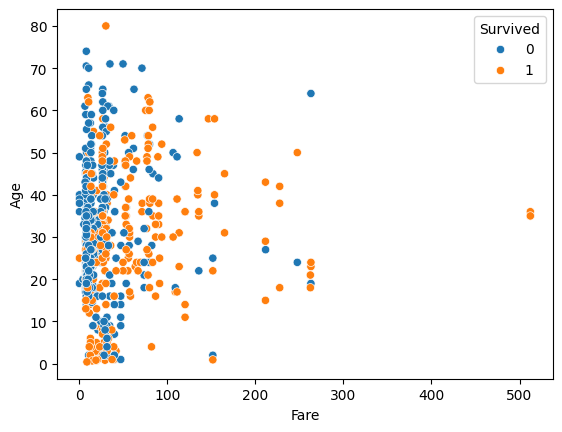

In [41]:
sns.scatterplot(x = train_df.Fare, y = train_df['Age'], hue = train_df['Survived'])
plt.show()

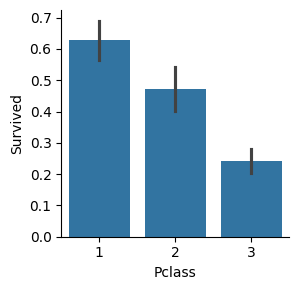

In [42]:
sns.catplot(x = 'Pclass', y = "Survived", data=train_df, kind='bar', height=3)
plt.show()

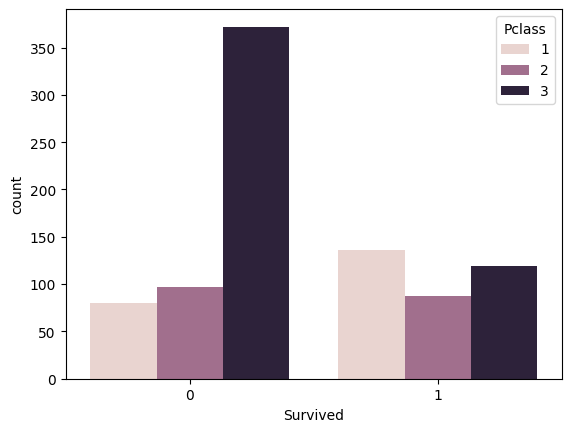

In [43]:
sns.countplot(x="Survived", hue='Pclass', data=train_df)
plt.show()

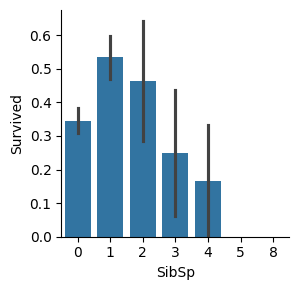

In [44]:
sns.catplot(x="SibSp", y ="Survived", data=train_df, kind="bar", height=3)
plt.show()

In [45]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])

Parch Survived          
           count      mean
0     0      678  0.343658
1     1      118  0.550847
2     2       80  0.500000
3     3        5  0.600000
4     4        4  0.000000
5     5        5  0.200000
6     6        1  0.000000

In [46]:
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Embarked Survived          
              count      mean
0        C      168  0.553571
1        Q       77  0.389610
2        S      644  0.336957

In [48]:
!pip install Jinja2


  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-macosx_10_9_universal2.whl.metadata (3.0 kB)
Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
Using cached MarkupSafe-2.1.5-cp310-cp310-macosx_10_9_universal2.whl (18 kB)


In [49]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [50]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')